# Graph Embedding Implementation: DeepWalk and Node2Vec

두 가지 그래프 임베딩 알고리즘을 구현합니다:
1. DeepWalk
2. Node2Vec

예제 그래프로 Zachary's karate club 데이터셋 사용

## 1. Import Required Libraries

In [2]:
!pip install gensim seaborn

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

from gensim.models import Word2Vec
import seaborn as sns
from sklearn.manifold import TSNE

## 2. Create Sample Graph

In [2]:
def create_sample_graph():
    G = nx.karate_club_graph()
    return G

# Correctness 확인
G = create_sample_graph()
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
assert G.number_of_nodes() == 34, "Karate club graph should have 34 nodes"

Number of nodes: 34
Number of edges: 78


## 3. DeepWalk Implementation

In [3]:
def random_walk(G, start_node, length):
    walk = [start_node]
    for _ in range(length):
        curr = walk[-1]
        neighbors = list(G.neighbors(curr))
        if neighbors:
            walk.append(random.choice(neighbors))
    return [str(node) for node in walk]

def deep_walk(G, walk_length, num_walks, dimensions):
    walks = []
    nodes = list(G.nodes())
    
    for _ in range(num_walks):
        random.shuffle(nodes)
        for node in nodes:
            walk = random_walk(G, node, walk_length)
            walks.append(walk)
    
    model = Word2Vec(walks, vector_size=dimensions, window=5, min_count=0, sg=1, workers=4)
    return model

# Correctness 확인
test_walk = random_walk(G, 0, 5)
print(f"Sample random walk: {test_walk}")=

Sample random walk: ['0', '31', '0', '1', '17', '0']


## 4. Node2Vec Implementation

In [4]:
def biased_random_walk(G, start_node, length, p, q):
    walk = [start_node]
    for _ in range(length):
        curr = walk[-1]
        prev = walk[-2] if len(walk) > 1 else None
        neighbors = list(G.neighbors(curr))
        if not neighbors:
            break
            
        if prev is None:
            walk.append(random.choice(neighbors))
        else:
            next_node = sample_next_node(G, curr, prev, neighbors, p, q)
            walk.append(next_node)
    return [str(node) for node in walk]

def sample_next_node(G, curr, prev, neighbors, p, q):
    return random.choice(neighbors)

def node2vec(G, walk_length, num_walks, dimensions, p, q):
    walks = []
    nodes = list(G.nodes())
    
    for _ in range(num_walks):
        random.shuffle(nodes)
        for node in nodes:
            walk = biased_random_walk(G, node, walk_length, p, q)
            walks.append(walk)
    
    model = Word2Vec(
        walks, vector_size=dimensions, 
        window=5, min_count=0, 
        sg=1, workers=4
    )
    return model

# Correctness 확인
test_biased_walk = biased_random_walk(G, 0, 5, 1, 1)
print(f"Sample biased random walk: {test_biased_walk}")

Sample biased random walk: ['0', '1', '0', '2', '13', '33']


## 5. Visualization Functions

In [5]:
def plot_embeddings(model, G, algorithm_name):
    # Node embeddings
    node_embeddings = np.zeros((len(G.nodes()), model.vector_size))
    for i, node in enumerate(G.nodes()):
        node_embeddings[i] = model.wv[str(node)]
    
    # 시각화를 위한 차원축소로 TSNE 사용
    tsne = TSNE(n_components=2, random_state=42)
    node_embeddings_2d = tsne.fit_transform(node_embeddings)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1])
    
    # Node labels 추가
    for i, node in enumerate(G.nodes()):
        plt.annotate(node, (node_embeddings_2d[i, 0], node_embeddings_2d[i, 1]))
    
    plt.title(f'{algorithm_name} Node Embeddings Visualization')
    plt.show()

## 6. Run Experiments

Running DeepWalk...


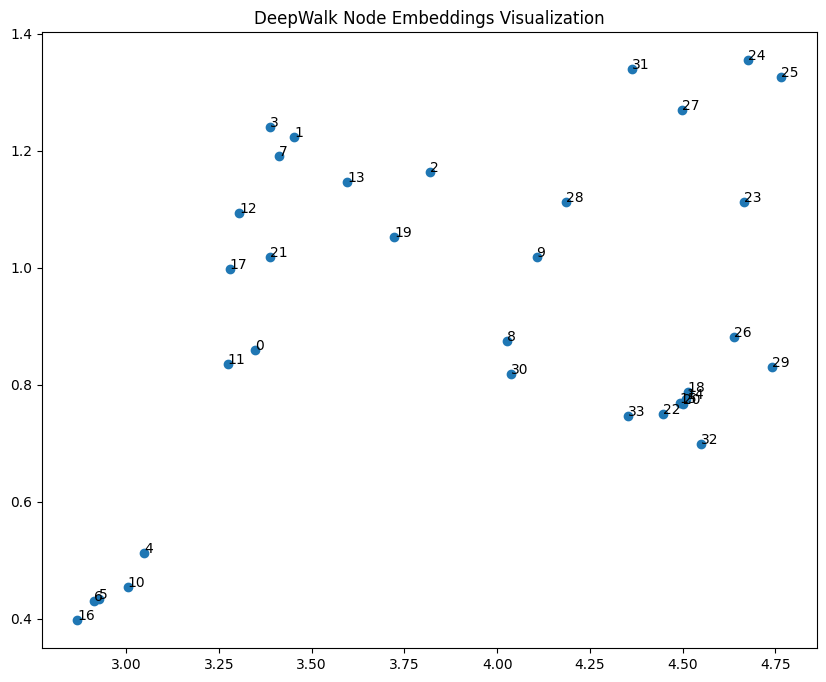

Running Node2Vec...


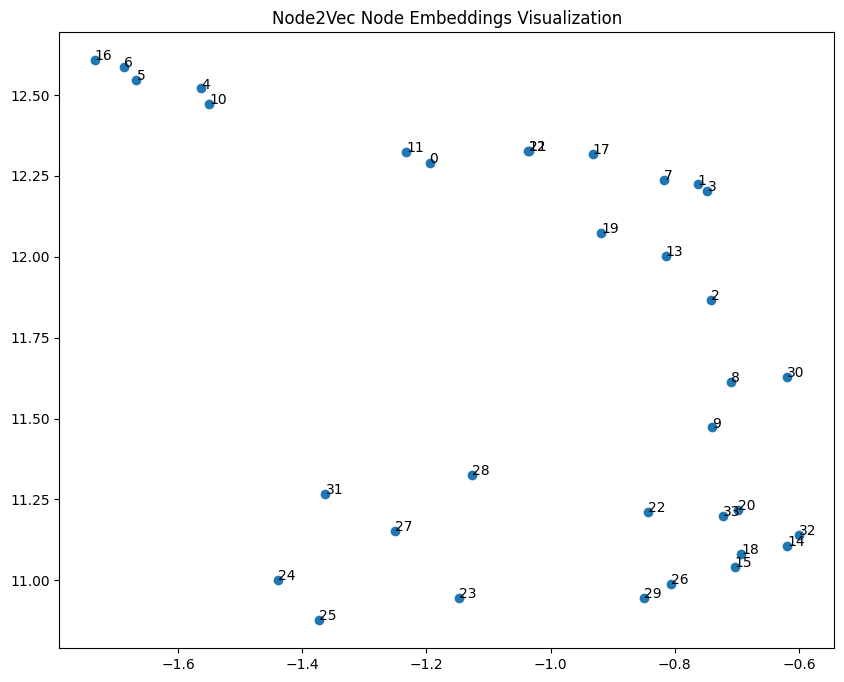

In [6]:
# Parameters
WALK_LENGTH = 10
NUM_WALKS = 80
DIMENSIONS = 128
P = 1
Q = 1

# DeepWalk 실행
print("Running DeepWalk...")
deepwalk_model = deep_walk(G, WALK_LENGTH, NUM_WALKS, DIMENSIONS)
plot_embeddings(deepwalk_model, G, "DeepWalk")

# embedding dimensions 임베딩 차원 확인
assert deepwalk_model.vector_size == DIMENSIONS, "Embedding dimensions don't match"

# Node2Vec 실행
print("Running Node2Vec...")
node2vec_model = node2vec(G, WALK_LENGTH, NUM_WALKS, DIMENSIONS, P, Q)
plot_embeddings(node2vec_model, G, "Node2Vec")

# embedding dimensions 임베딩 차원 확인
assert node2vec_model.vector_size == DIMENSIONS, "Embedding dimensions don't match"

## 7. Visualize Original Graph

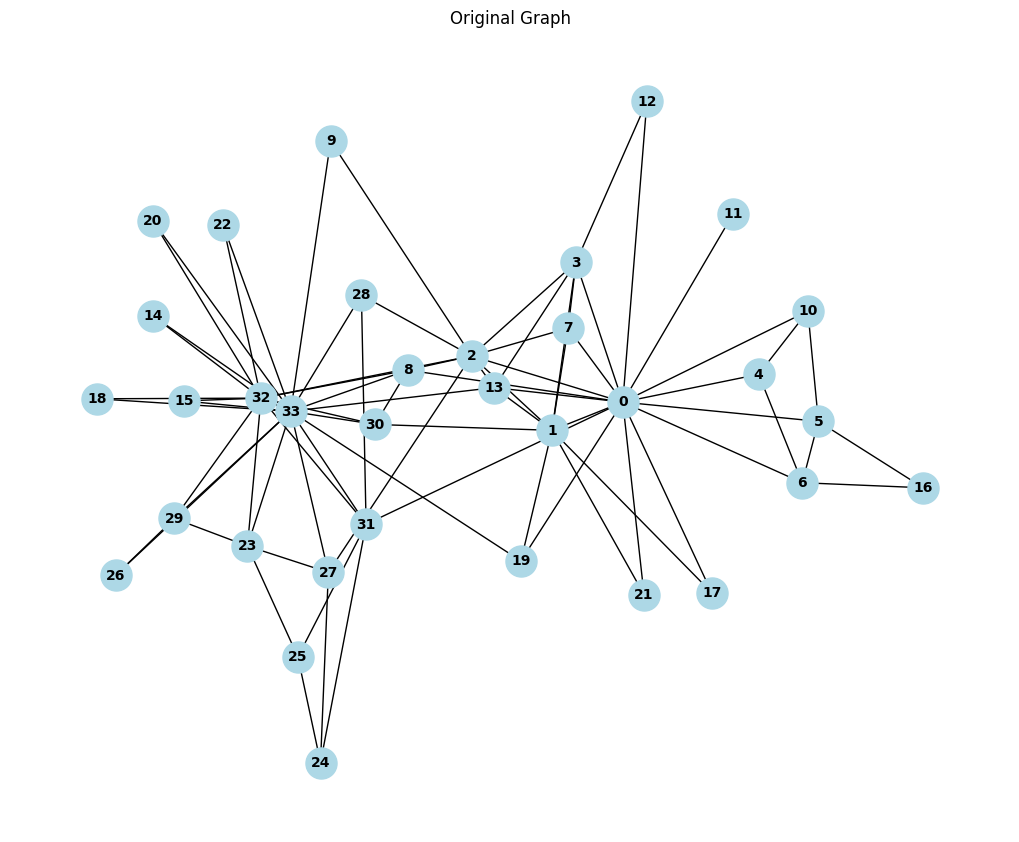

In [7]:
plt.figure(figsize=(10, 8))
nx.draw(
    G, with_labels=True, 
    node_color='lightblue', 
    node_size=500, 
    font_size=10, 
    font_weight='bold'
)
plt.title("Original Graph")
plt.show()

## Conclusion

We have successfully implemented and visualized:
1. DeepWalk algorithm
2. Node2Vec algorithm
3. Original graph structure

임베딩은 노드 분류, 링크 예측, 커뮤니티 감지 등 다양한 다운스트림 작업에 사용할 수 있다.